HANDLING MISSING DATA (NUMERICAL)

step 1: importing lib

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

step 2: load your data set 

In [3]:
df=pd.read_csv('titanic_toy.csv')
df.sample(5)


,Age,Fare,Family,Survived
209,40.0,31.0000,0,1
63,4.0,27.9000,5,0
197,42.0,8.4042,1,0
476,34.0,21.0000,1,0
53,29.0,26.0000,1,1


step 3:train test split

In [4]:
x=df.drop(columns=['Survived'])
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

step 4:finding mean and median of the column having missng value 

In [5]:
mean_age=df['Age'].mean()
median_age=df['Age'].median()

mean_fare=df['Fare'].mean()
median_fare=df['Fare'].median()

step 5: filling the missing values using mean or median 

In [6]:
x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Fare_median']=x_train['Fare'].fillna(median_fare)

In [7]:
x_train.isnull().sum()

Age            134
Fare            36
Family           0
Age_mean         0
Fare_median      0
dtype: int64

step 6:distribution me kesa change aya 

<Axes: ylabel='Density'>

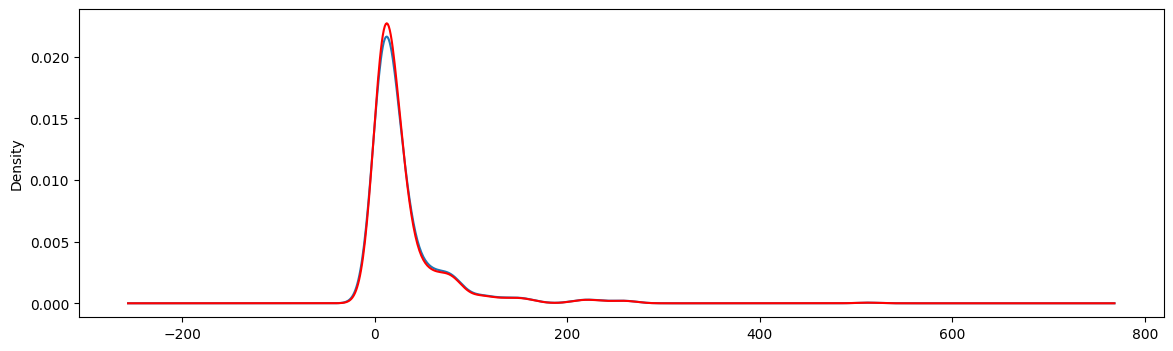

In [8]:
fig=plt.figure(figsize=(14,4))
ax=fig.add_subplot(1,1,1)  #to plot them on a same graph

# x_train['Age'].plot(kind='kde',ax=ax)
# x_train['Age_mean'].plot(kind='kde', ax=ax, color='red')
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_median'].plot(kind='kde',ax=ax,color='red')

step 7: finfing outliers

<Axes: >

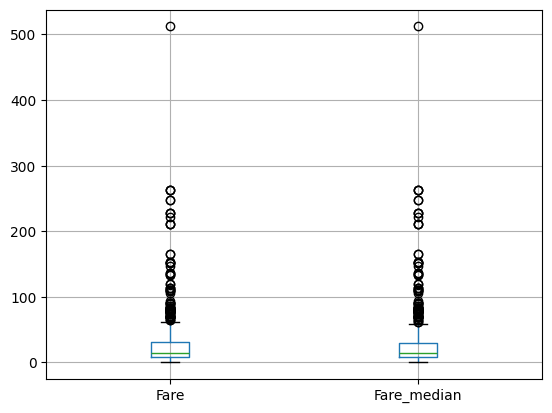

In [9]:
# x_train[['Age','Age_mean']].boxplot()
x_train[['Fare','Fare_median']].boxplot()

mt 2:using sklearn

In [10]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
])

trf.fit(x_train)
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)